<a href="https://colab.research.google.com/github/skipperuzumaki/Censored_Database_Sample/blob/main/Copy_of_(Apply_Different_Classifiers)Jatin_Rishi_18BCS060_Lab_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, make_scorer, f1_score
from sklearn.model_selection import cross_val_score


In [ ]:
data = pd.read_csv('Dataset.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          200 non-null    object
 1   v2          200 non-null    object
 2   Unnamed: 2  2 non-null      object
 3   Unnamed: 3  1 non-null      object
dtypes: object(4)
memory usage: 6.4+ KB


In [ ]:

X = data['v2'].values
Y = data['v1'].values
print(Y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=0)


cv = CountVectorizer() 
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

['ham' 'ham' 'spam' 'ham' 'ham' 'spam' 'ham' 'ham' 'spam' 'spam' 'ham'
 'spam' 'spam' 'ham' 'ham' 'spam' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham'
 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham'
 'spam' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham' 'ham'
 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'spam' 'ham'
 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'spam' 'spam'
 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham'
 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham'
 'spam' 'ham' 'spam' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham'
 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham' 'spam'
 'ham' 'ham' 'spam' 'spam' 'spam' 'spam' 'spam' 'spam' 'spam' 'spam'
 'spam' 'spam' 'spam' 'spam' 'spam' 'spam' 'spam' 'spam' 'spam' 'spam'
 'spam' 'spam' 'spam' 'spam' 'spam' 'spam' 'spam' 'spam' 'spam' 'spam'
 'spam' 'spam' 'spam' 'spam' 'spam' 'spam' 'spam' 'spam' '

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

models = [SVC(kernel = 'rbf', random_state = 0),RandomForestClassifier(),LogisticRegression(random_state=0),AdaBoostClassifier(),xgb.XGBClassifier()]

total_recall = []
total_precision = []
total_fScore = []

for model in models:
  classifier = model
  classifier.fit(X_train, y_train)
  print(classifier.score(X_test,y_test))
  y_pred = classifier.predict(X_test)
  print(metrics.confusion_matrix(y_test, y_pred))
  report = metrics.classification_report(y_test, y_pred,target_names=['Ham', 'Spam'])
  print(report)

  print('Accuracy -> ',metrics.accuracy_score(y_test, y_pred))

  precision_scorer = make_scorer(precision_score, pos_label='spam')
  precisions = cross_val_score(classifier, X_train, y_train, cv=5, scoring=precision_scorer)
  print('Precision -> ', np.mean(precisions))
  total_precision.append(np.mean(precisions))
  
  recall_scorer = make_scorer(recall_score, pos_label='spam')
  recalls = cross_val_score(classifier, X_train, y_train, cv=5, scoring=recall_scorer)
  print('Recalls -> ', np.mean(recalls))
  total_recall.append(np.mean(recalls))

  f1_scorer = make_scorer(f1_score, pos_label='spam')
  f1score = cross_val_score(classifier, X_train, y_train, cv=5, scoring=f1_scorer)
  print('F1Score -> ', np.mean(f1score))
  total_fScore.append(np.mean(f1score))


0.85
[[19  0]
 [ 6 15]]
              precision    recall  f1-score   support

         Ham       0.76      1.00      0.86        19
        Spam       1.00      0.71      0.83        21

    accuracy                           0.85        40
   macro avg       0.88      0.86      0.85        40
weighted avg       0.89      0.85      0.85        40

Accuracy ->  0.85
Precision ->  0.8520369551329304
Recalls ->  0.9116666666666667
F1Score ->  0.8783868092691621
0.875
[[19  0]
 [ 5 16]]
              precision    recall  f1-score   support

         Ham       0.79      1.00      0.88        19
        Spam       1.00      0.76      0.86        21

    accuracy                           0.88        40
   macro avg       0.90      0.88      0.87        40
weighted avg       0.90      0.88      0.87        40

Accuracy ->  0.875
Precision ->  1.0
Recalls ->  0.8108333333333334
F1Score ->  0.8917295163123862
0.875
[[19  0]
 [ 5 16]]
              precision    recall  f1-score   support

     

In [ ]:
print(total_recall)
print(total_precision)
print(total_fScore)
values = ['SVM','Random Forest','Logistic Regression','AdaBoost','XGBoost']

[0.9116666666666667, 0.8108333333333334, 0.8608333333333335, 0.8858333333333335, 0.7975]
[0.8520369551329304, 1.0, 0.9732142857142858, 0.8923809523809524, 0.9329487179487179]
[0.8783868092691621, 0.8917295163123862, 0.9125246305418718, 0.8857347670250896, 0.8564438147029915]


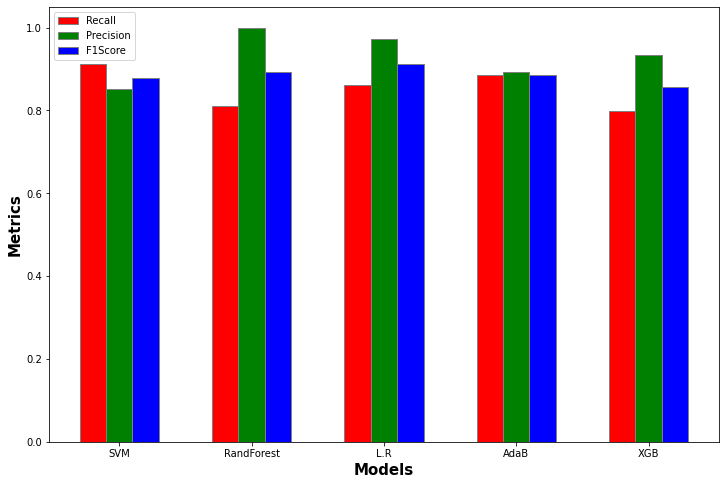

In [ ]:
import matplotlib.pyplot as plt

barWidth = 0.2

fig = plt.subplots(figsize =(12, 8))

br1 = np.arange(5)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
plt.bar(br1, total_recall, color ='r', width = barWidth,
        edgecolor ='grey', label ='Recall')
plt.bar(br2, total_precision, color ='g', width = barWidth,
        edgecolor ='grey', label ='Precision')
plt.bar(br3, total_fScore, color ='b', width = barWidth,
        edgecolor ='grey', label ='F1Score')

plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Metrics', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(5)],['SVM', 'RandForest', 'L.R', 'AdaB', 'XGB'])
 
plt.legend()
plt.show()